In [1]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

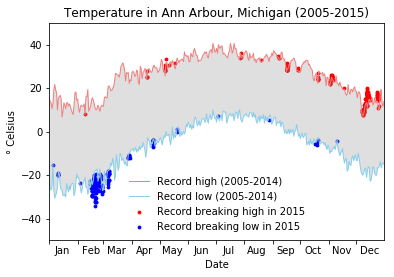

In [23]:
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Convert all data to degrees Celsius:
data['Data_Value'] = data['Data_Value']*0.1

data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year

data['Month_Day'] = data['Date'].dt.strftime('%m-%d')

# Remove February 29:
data = data[data['Month_Day']!='02-29']

# Max and min data after grouping by each day:
max_temp = data[(data.Year >= 2005) & (data.Year < 2015) & (data['Element'] == 'TMAX')].groupby(['Month_Day'])['Data_Value'].max()
min_temp = data[(data.Year >= 2005) & (data.Year < 2015) & (data['Element'] == 'TMIN')].groupby(['Month_Day'])['Data_Value'].min()

# Record breaking data:
data = data.merge(max_temp.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}), on='Month_Day', how='left')
data = data.merge(min_temp.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}), on='Month_Day', how='left')

record_high = data[(data.Year==2015)&(data.Data_Value > data.Max_temp)]
record_low = data[(data.Year==2015)&(data.Data_Value < data.Min_temp)]

# X Axis spanning 2015 only:
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

plt.figure()

plt.plot(date_index,max_temp,color='lightcoral', linewidth=1) # Max in red.
plt.plot(date_index,min_temp,color='skyblue', linewidth=1) # Min in blue.

plt.scatter(record_high.Date.values, record_high.Data_Value.values, color='red', s=8)
plt.scatter(record_low.Date.values, record_low.Data_Value.values, color='blue', s=8)

# Set x and y limits.
ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-50,50])

# Set axis names and title:
plt.xlabel('Date', fontsize=10)
plt.ylabel('° Celsius', fontsize=10)
plt.title('Temperature in Ann Arbour, Michigan (2005-2015)', fontsize=12)

# Create legend and title
# loc=0 provides the best position for the legend
plt.legend(['Record high (2005-2014)','Record low (2005-2014)','Record breaking high in 2015','Record breaking low in 2015'],loc=0,frameon=False)

# Fill colour between highs and lows:
# alpha adjusts darkness of the shade.
ax.fill_between(date_index, max_temp, min_temp, facecolor='grey', alpha=0.25)

# Where you locate the major and minor ticks:
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) # Put the label at the minor tick so it's in the center.
#ax.yaxis.set_minor_locator()

# What you put at the ticks:
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# 1 refers to the bottom of the plot for xticks and the left for yticks
# 2 refers to the top of the plot for xticks and the right for yticks
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0) # Make small ticker disappear
    tick.label1.set_horizontalalignment('center')


In [ ]:
!tar chvfz notebook.tar.gz *

Assignment2.ipynb
Assignment3.ipynb
Assignment4.ipynb
Dejunking.ipynb
Matplotlib_3D.ipynb
Test.ipynb
UnderstandingDistributionsThroughSampling.ipynb
Week2.ipynb
Week3.ipynb
Week4.ipynb
avg_hourly.csv
avg_weekly.csv
data/
data/C2A2_data/
data/C2A2_data/GHCND_10Year.h5
